# Convolutional Neural Network

### Importing the libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.18.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [ ]:
# Ініціалізація ImageDataGenerator для підготовки зображень з різними трансформаціями
train_datagen = ImageDataGenerator(
    rescale = 1./255,         # Масштабування пікселів зображень до діапазону [0, 1]
    shear_range = 0.2,        # Рандомне зсування (shear) зображень для збільшення варіативності
    zoom_range = 0.2,         # Рандомне збільшення/зменшення зображень (zoom) для варіативності
    horizontal_flip = True    # Рандомне горизонтальне відображення зображень
)

# Завантаження зображень з директорії 'dataset/training_set' з певними параметрами
training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Unidatalab/genai-course/lesson_4/dataset/training_set',     # Шлях до директорії з тренувальними зображеннями
    target_size = (64, 64),     # Перемасштабування зображень до розміру 64x64 пікселів
    batch_size = 32,            # Розмір пакету (batch) зображень, який буде використовуватись при тренуванні
    class_mode = 'binary'       # Модель кодування міток: двійкова класифікація (наприклад, 0 або 1)
)


Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(
    rescale = 1./255  # Масштабування пікселів зображень до діапазону [0, 1] для нормалізації
)

# Завантаження тестових зображень з директорії 'dataset/test_set' з певними параметрами
test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Unidatalab/genai-course/lesson_4/dataset/test_set',     # Шлях до директорії з тестовими зображеннями
    target_size = (64, 64),  # Перемасштабування зображень до розміру 64x64 пікселів
    batch_size = 32,         # Розмір пакету (batch) зображень, який буде використовуватись при тестуванні
    class_mode = 'binary'    # Модель кодування міток: двійкова класифікація (наприклад, 0 або 1)
)


Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
# Створення порожньої послідовної моделі (Sequential) для побудови нейронної мережі
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [ ]:
# Додавання 2D-конвуляційного шару до моделі
cnn.add(tf.keras.layers.Conv2D(
    filters=32,               # Кількість фільтрів (каналів) у шарі, що визначає кількість вихідних характеристик
    kernel_size=3,            # Розмір ядра (фільтру), який буде застосовуватись до зображення (3x3)
    activation='relu',        # Функція активації ReLU для додавання нелінійності
    input_shape=[64, 64, 3]   # Формат вхідних даних: зображення розміру 64x64 з 3 каналами (RGB)
))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 2 - Pooling

In [ ]:
# Додавання шару максимального підвибору (MaxPooling) для зменшення розміру зображення
cnn.add(tf.keras.layers.MaxPool2D(
    pool_size=2,        # Розмір пулінгового вікна (2x2) для вибору максимального значення в кожному регіоні
    strides=2           # Крок скидання вікна, який визначає, на скільки пікселів переміщається вікно
))


### Adding a second convolutional layer

In [ ]:
# Додавання ще одного 2D-конвуляційного шару до моделі
cnn.add(tf.keras.layers.Conv2D(
    filters=32,               # Кількість фільтрів (каналів) у шарі, що визначає кількість вихідних характеристик
    kernel_size=3,            # Розмір ядра (фільтру), який буде застосовуватись до зображення (3x3)
    activation='relu'         # Функція активації ReLU для додавання нелінійності
))

# Додавання ще одного шару максимального підвибору (MaxPooling) для зменшення розміру зображення
cnn.add(tf.keras.layers.MaxPool2D(
    pool_size=2,        # Розмір пулінгового вікна (2x2) для вибору максимального значення в кожному регіоні
    strides=2           # Крок скидання вікна, який визначає, на скільки пікселів переміщається вікно
))


### Step 3 - Flattening

In [ ]:
# Додавання шару Flatten для перетворення 2D-матриць в 1D-вектор
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [ ]:
# Додавання повнозв'язного (Dense) шару з 128 одиницями та функцією активації ReLU
cnn.add(tf.keras.layers.Dense(
    units=128,             # Кількість нейронів (одиниць) у цьому шарі
    activation='relu'      # Функція активації ReLU для додавання нелінійності
))


### Step 5 - Output Layer

In [ ]:
# Додавання вихідного повнозв'язного (Dense) шару з 1 одиницею та функцією активації Sigmoid
cnn.add(tf.keras.layers.Dense(
    units=1,               # Кількість нейронів (1) у вихідному шарі (для бінарної класифікації)
    activation='sigmoid'   # Функція активації Sigmoid, яка обмежує вихідне значення до діапазону [0, 1]
))


## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
# Компіляція моделі з вказаними оптимізатором, функцією втрат і метриками
cnn.compile(
    optimizer='adam',                  # Оптимізатор Adam для ефективного оновлення ваг моделі
    loss='binary_crossentropy',         # Функція втрат для бінарної класифікації (перехресна ентропія)
    metrics=['accuracy']                # Метрика точності для оцінки ефективності моделі
)

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Оголошуємо колбек EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',          # Моніторинг метрики для зупинки (можна використовувати 'val_accuracy' для точності)
    patience=3,                  # Кількість епох, після яких зупиняємо тренування, якщо немає покращень
    verbose=1,                   # Виведення повідомлення про зупинку тренування
    restore_best_weights=True    # Повертаємо ваги моделі на найкращий етап (найменший val_loss)
)

# Навчання моделі з використанням early stopping
cnn.fit(
    x=training_set,              # Тренувальні дані
    validation_data=test_set,    # Дані для валідації
    epochs=5,                   # Кількість епох для тренування
    steps_per_epoch=len(training_set),  # Кількість кроків на одну епоху
    validation_steps=len(test_set),    # Кількість кроків на валідацію
    verbose=1,                   # Виведення прогресу тренування
    callbacks=[early_stopping]    # Додаємо колбек EarlyStopping для моніторингу процесу
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2126s 8s/step - accuracy: 0.5562 - loss: 0.6849 - val_accuracy: 0.6850 - val_loss: 0.6010
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 103s 179ms/step - accuracy: 0.6840 - loss: 0.5946 - val_accuracy: 0.6970 - val_loss: 0.5769
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 180ms/step - accuracy: 0.7051 - loss: 0.5646 - val_accuracy: 0.7440 - val_loss: 0.5369
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 181ms/step - accuracy: 0.7055 - loss: 0.5529 - val_accuracy: 0.7185 - val_loss: 0.5569
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 48s 192ms/step - accuracy: 0.7291 - loss: 0.5285 - val_accuracy: 0.7510 - val_loss: 0.5079
Restoring model weights from the end of the best epoch: 5.


## Part 4 - Making a single prediction

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
# Завантаження зображення для передбачення та зміна його розміру до 64x64 пікселів
test_image = image.load_img('/content/drive/MyDrive/Unidatalab/genai-course/lesson_4/british-shorthair-1.jpg', target_size = (64, 64))

# Перетворення зображення в масив (числове представлення)
test_image = image.img_to_array(test_image)

# Додавання додаткового виміру, щоб відповідати формату вхідних даних моделі (1, 64, 64, 3)
test_image = np.expand_dims(test_image, axis = 0)

# Прогнозування класу для зображення
result = cnn.predict(test_image)

# Перевірка, до якого класу належить зображення: 'dog' або 'cat'
training_set.class_indices   # Виведення відповідностей класів (мітки) для тренувального набору
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

probability = result[0][0]
print(f"Probability: {probability}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
dog
Probability: 1.0


In [ ]:
print(prediction)

dog


#RNN/LSTM


**Мета**

Підготувати текстові дані з датасету IMDb для задачі бінарної класифікації (класифікація відгуку як позитивний або негативний). Застосовується для навчання моделі RNN/LSTM/GRU.



Послідовна Приклад-Схема роботи LSTM
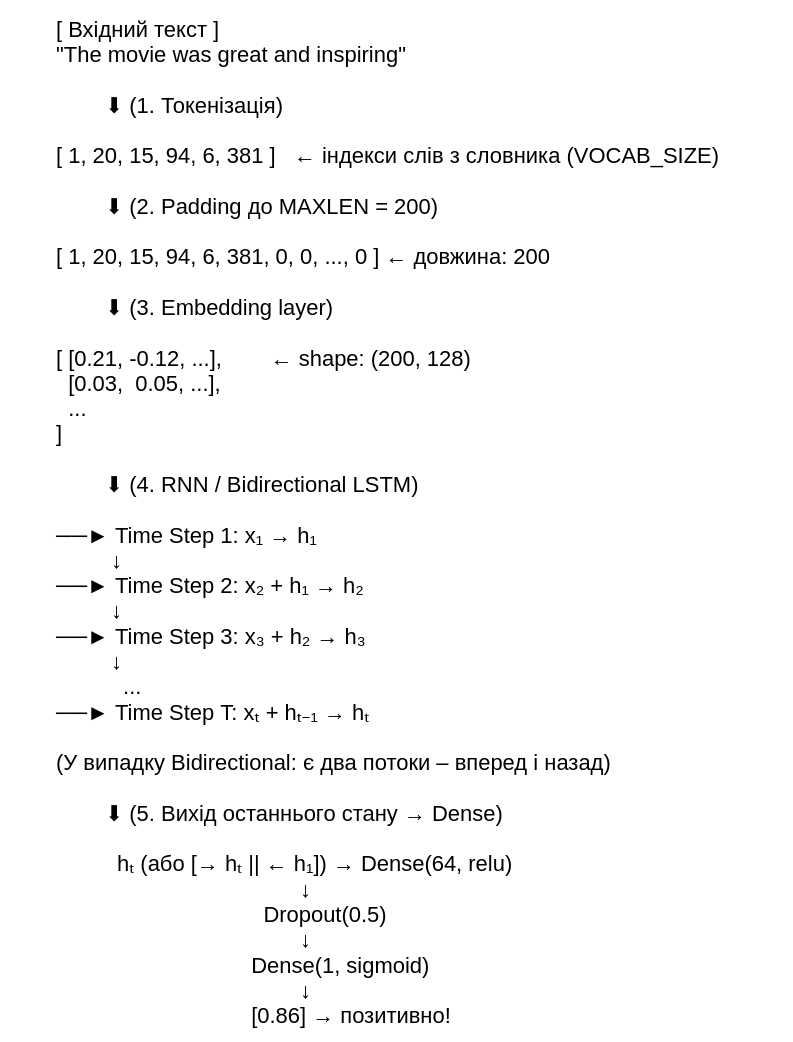

1. Токенізація (перетворення тексту в числа)
Ми не можемо подавати сирий текст у модель, тому кожне слово замінюємо числом

    "the" → 1
    "movie" → 20
    "great" → 94
    ...

Весь відгук стає списком чисел

[1, 20, 15, 94, 6, 381]

2. Вирівнювання довжини (padding)

Не всі відгуки однакової довжини. Щоб модель могла працювати з ними, ми

- обрізаємо занадто довгі

- доповнюємо короткі нулями до фіксованої довжини (наприклад, 200 слів)


Отримаємо:

[1, 20, 15, 94, 6, 381, 0, 0, ..., 0]  ← 200 елементів

3. Embedding — перехід до векторів
Числа самі по собі нічого не значать. Ми перетворюємо кожне число на вектор, який зберігає "сенс" слова:

1 → [0.2, -0.1, 0.5, ..., 0.3]  (вектор з 128 чисел)

Тепер у нас є таблиця слів, де кожне слово — це вектор ознак (features).

4. RNN або LSTM читає послідовність

RNN (або краще LSTM) читає відгук по черзі, слово за словом.

На кожному кроці пам’ятає, що прочитав раніше.

    Прочитав "not" → негативно.

    Прочитав "not bad" → добре, змінює думку.

Приклад  тренування

| Крок | Вхідне слово | Що бере RNN     | Що повертає   |
| ---- | ------------ | --------------- | ------------- |
| t=1  | "The"        | `x₁` + `h₀ = 0` | `h₁`          |
| t=2  | "movie"      | `x₂` + `h₁`     | `h₂`          |
| t=3  | "was"        | `x₃` + `h₂`     | `h₃`          |
| t=4  | "absolutely" | `x₄` + `h₃`     | `h₄`          |
| t=5  | "fantastic"  | `x₅` + `h₄`     | `h₅`          |

xₜ - векторизоване слово
hₜ₋₁ - прихований попередній стан
hₜ — нова пам'ять

**Останній стан h₅ — це зведена інформація  всього речення.**

5. Bidirectional (двонаправлений аналіз)

Ми використовуємо двонаправлену LSTM

    Один "потік" читає текст зліва направо,

    Інший — справа наліво.

Це допомагає враховувати і минулий, і майбутній контекст слова.
6. Класифікація

Після того, як весь текст прочитано, RNN повертає вектор стану  він містить інформацію про зміст всього відгуку.

Цей вектор подається далі -->

    в Dense-шар — для обробки

    в Dropout — щоб уникнути перенавчання

    в вихідний нейрон з функцією sigmoid, яка дає результат:

    0.91 → позитивний відгук  
    0.14 → негативний відгук

In [37]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
# Кількість найбільш частих слів, які будемо враховувати
VOCAB_SIZE = 10_000

# Максимальна довжина огляду (усі огляди приведуться до цієї довжини)
MAXLEN = 200

# Завантаження датасету IMDb. Кожен огляд — це список індексів слів
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.imdb.load_data(num_words=VOCAB_SIZE)

# Візьмемо 20 000 прикладів для тренування та 4 000 для валідації
N = 20000
train_x, train_y = train_x[:N], train_y[:N]
test_x,  test_y  = test_x[:N//5], test_y[:N//5]

# Доповнюємо (padding) або обрізаємо (truncating) послідовності до MAXLEN
train_x = pad_sequences(train_x, maxlen=MAXLEN, padding='post', truncating='post')
test_x  = pad_sequences(test_x,  maxlen=MAXLEN, padding='post', truncating='post')

In [18]:
# Приклади відгуків з датасету

# Завантажити словник (word index)
word_index = tf.keras.datasets.imdb.get_word_index()

# Зсунути індекси, бо tf.keras зарезервував 0,1,2
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

# Зробити індекси у зворотному порядку — числа → слова
reverse_word_index = {v: k for k, v in word_index.items()}

# Функція для розшифровки числової послідовності в текст
def decode_review(text_ids):
    return ' '.join([reverse_word_index.get(i, '?') for i in text_ids])

# Вивести кілька прикладів з train set
for i in range(5):
    print(f"\n📄 Review #{i}")
    print("Text:", decode_review(train_x[i]))
    print("Label:", "positive" if train_y[i] == 1 else "negative")


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

📄 Review #0
Text: <START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the who

In [41]:

# Побудова моделі
model = tf.keras.Sequential([
    # Шар embedding перетворює індекси слів у вектори розмірності 128
    tf.keras.layers.Embedding(VOCAB_SIZE, 128, input_length=MAXLEN),

    # Двосторонній LSTM — дозволяє враховувати як лівий, так і правий контекст
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64, dropout=0.3, recurrent_dropout=0.3)
    ),

    # Повнозв'язний шар з ReLU-активацією — для навчання більш складних патернів
    tf.keras.layers.Dense(64, activation='relu'),

    # Dropout — вимикає 50% нейронів під час тренування для боротьби з перенавчанням
    tf.keras.layers.Dropout(0.5),

    # Останній шар — один нейрон з сигмоїдою для бінарної класифікації (0 або 1)
    tf.keras.layers.Dense(1, activation='sigmoid')
])
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, MAXLEN))
model.summary() # Вивели табличку архітектури NN

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,387,137 (5.29 MB)

 Trainable params: 1,387,137 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Навчання моделі
model.fit(
    train_x, train_y,
    epochs=10,
    batch_size=64,
    validation_data=(test_x, test_y),
     callbacks=[early_stop]
)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 379s 1s/step - accuracy: 0.6206 - loss: 0.6344 - val_accuracy: 0.8020 - val_loss: 0.4561
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 382s 1s/step - accuracy: 0.8254 - loss: 0.4165 - val_accuracy: 0.8108 - val_loss: 0.4238
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - accuracy: 0.8651 - loss: 0.3400 - val_accuracy: 0.7972 - val_loss: 0.4554
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - accuracy: 0.8715 - loss: 0.3167 - val_accuracy: 0.8163 - val_loss: 0.4377


In [40]:
model.save('classification_review.keras') # Опціонально зберегти модель

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_api.py:107: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)


In [33]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Словник слів з IMDb
word_index = tf.keras.datasets.imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

# Наші тестові дані
text_1 = "This movie was absolutely terrible and boring"
text_2 = "I was amazed by plot! Incredible movie!"
# Токенізація вручну (перетворення в індекси)
def encode_review(text):
    tokens = text.lower().split()
    return [1] + [word_index.get(word, 2) for word in tokens]  # 1 = <START>, 2 = <UNK>

encoded_1 = encode_review(text_1)
padded_1 = pad_sequences([encoded_1], maxlen=200, padding='post', truncating='post')

encoded_2 = encode_review(text_2)
padded_2 = pad_sequences([encoded_2], maxlen=200, padding='post', truncating='post')
# Передбачення
pred_1 = model.predict(padded_1)
pred_2 = model.predict(padded_2)
print("Text 1:",f"\n {text_1}",f"\nClassification: \n", "positive" if pred_1[0][0] >= 0.5 else "negative")
print("Text 2:",f"\n {text_2}", f"\nClassification: \n","positive" if pred_2[0][0] >= 0.5 else "negative")

# Загалом для подібної класифікації тексту краще використовувати BERT/Transformers,
# оскільки вони значно краще розуміють контекст слів

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
Text 1: 
 This movie was absolutely terrible and boring 
Classification: 
 negative
Text 2: 
 I was amazed by plot! Incredible movie! 
Classification: 
 positive
